# Customer Churning: Analysis and Prediction

Prepared by Marvin Rubia ([My LinkedIn](https://www.linkedin.com/in/marvinrubia08/))

Source for Dataset: IBM Sample Data Sets via [Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn). The dataset describes customer data about a Telecommunication company services and whether each customer has churned or not.

## Importing libraries for analysis

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load and understand our raw dataset

In [176]:
url = 'https://raw.githubusercontent.com/marvin-rubia/Churn-Analysis-Prediction/main/WA_Fn-UseC_-Telco-Customer-Churn.csv'

df = pd.read_csv(url)

In [177]:
df.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [179]:
# Show only the rows that contain missing value(s) from any column

condition_null = df.isnull().any(axis=1)
df[condition_null]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [180]:
# Check duplicate rows

condition_dupl = df.duplicated()
df[condition_dupl]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


We have 21 columns with 7,043 records.

Most of our variables are categorical. Only __Tenure__ (number of months the customer has stayed with the company), __MonthlyCharges__ (monthly payment charged to the customer), and __TotalCharges__ (total amount charged to the customer) are the numerical variables. But we have to convert __TotalCharges__ to the proper float type.

In [181]:
# Count the distinct values of Churn column

df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

There are 1,869 customers who have churned (i.e. stopped being a customer for the service(s) of the Telecommunication company). This customer churn accounts for 26.5% of our dataset.

## Quick Datatype Transformation

We need to convert __TotalCharges__ to float type.

In [182]:
# Upon checking the values for TotalCharges, I realized it has values of ' '

condition = df['TotalCharges'] == ' '

df[condition]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [183]:
# Replace ' ' with 0

df['TotalCharges'].replace(' ', 0, inplace=True)

In [184]:
# Check if we successfully replaced the 11 TotalCharges values with 0

condition = df['TotalCharges'] == 0
df[condition]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0,No


In [185]:
# Convert TotalCharges column from object to float type

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [186]:
# Replace the 0 values with the mean of TotalCharges

total_mean = df['TotalCharges'].mean()
df['TotalCharges'].replace(0, total_mean, inplace=True)

In [187]:
# Check if TotalCharges column is not a float type

df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# <font color=blue>Data Exploration</font>

Note that we are interested in the __churned customers__. The goal of this analysis and prediction is to help the company decrease the churn rate (or retain more customers). With this in mind, I am going to separate a dataframe with records for _only_ the customers who have churned to see if a variable is a factor for that outcome.

In [188]:
# Create a dataframe for churned customers

condition = df['Churn'] == 'Yes'
df_churned = df[condition]

In [189]:
# Check the distinct count of our df_churned (it must be 1,869)

df_churned['Churn'].value_counts()

Yes    1869
Name: Churn, dtype: int64

### Demographic Factors

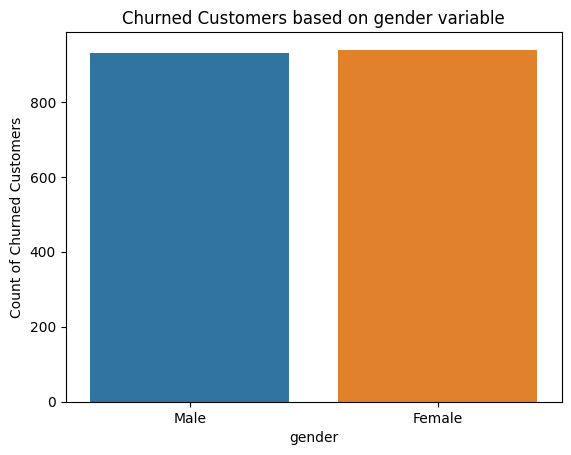

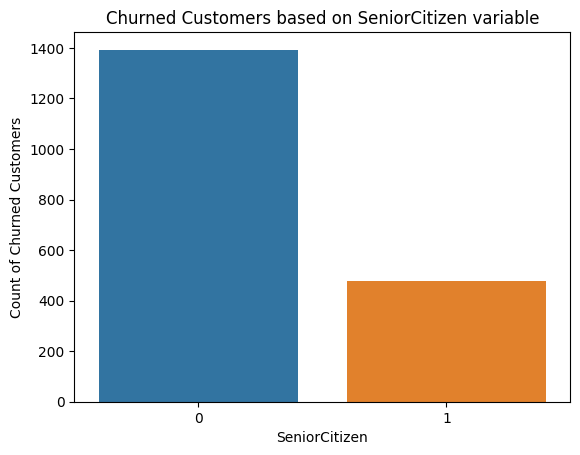

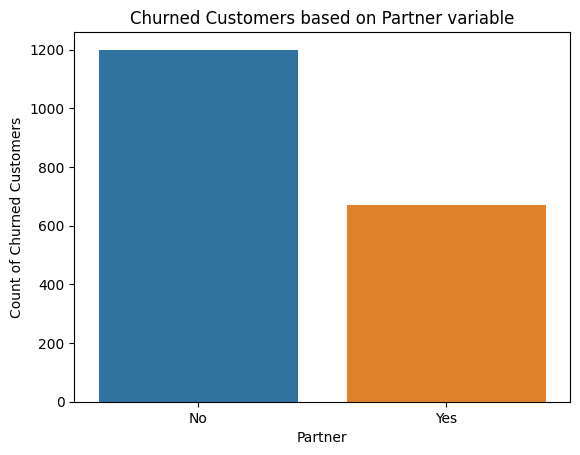

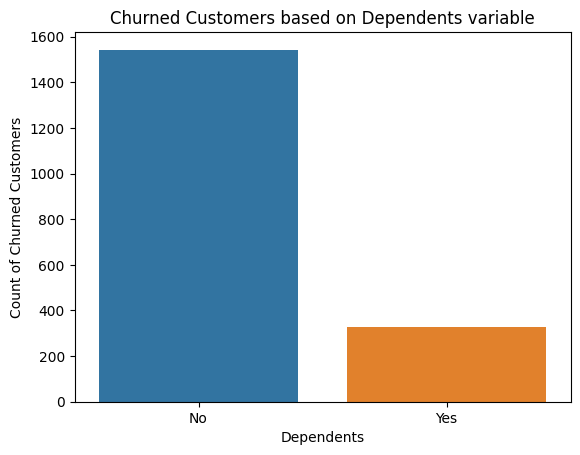

In [ ]:
# Plot the churning propensity based on demographic variables

demog_vars = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

for variable in demog_vars:
  sns.countplot(data=df_churned, x=variable)

  plt.title(f"Churned Customers based on {variable} variable")
  plt.ylabel('Count of Churned Customers')

  plt.show()

__Comments__:

1. The difference between males and females for churned customers is _insignificant_. Thus, gender does _not_ play a role in the propensity of customers to churn.

2. Seniors are _less_ likely to churn.

3. Customers with partners are _less_ likely to churn than those who are singles.

4. Customers with dependents are _less_ likely to churn than those who do not have dependents.

### Factors Based on Offered Services

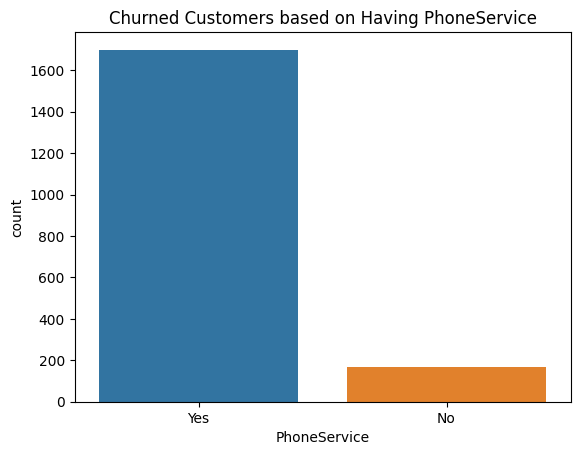

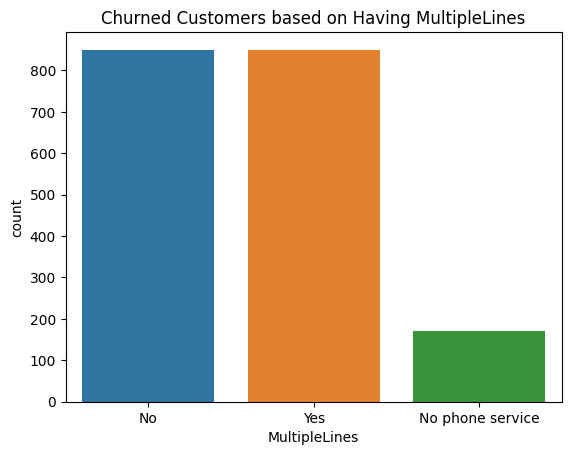

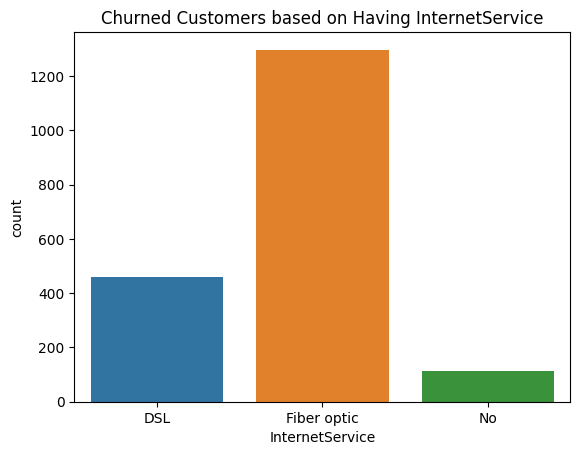

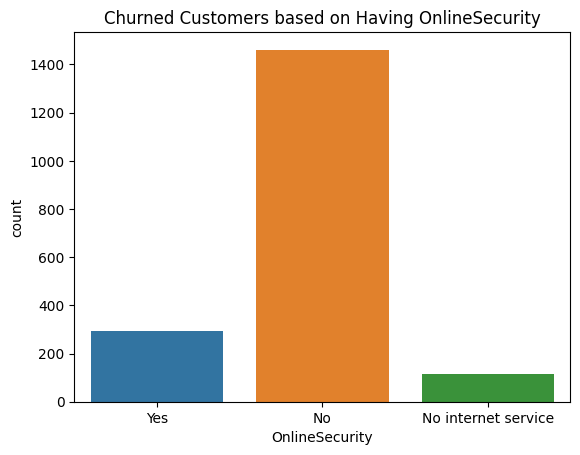

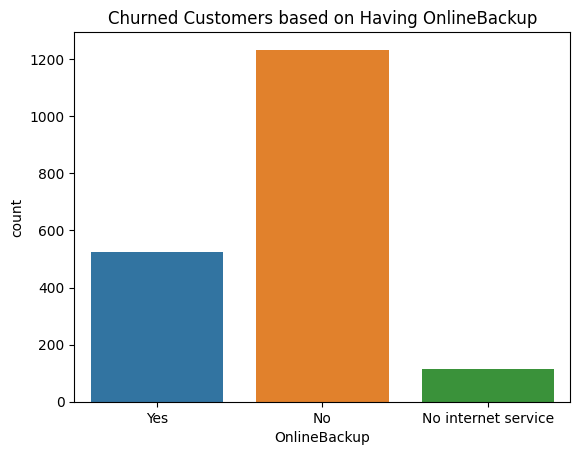

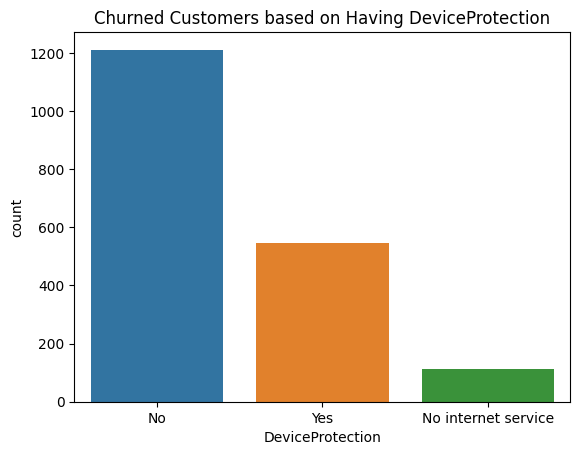

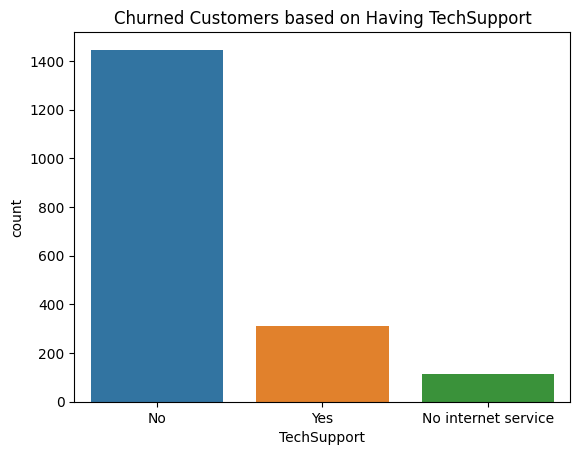

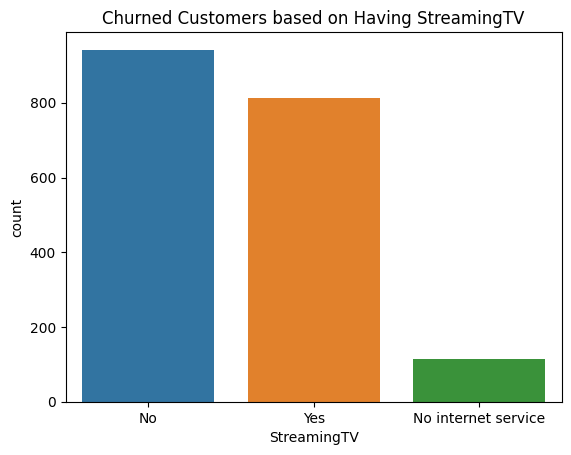

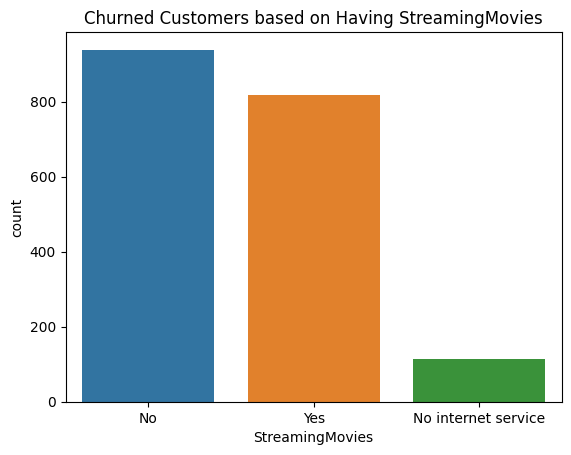

In [ ]:
# Plot the count of churned customers based on the offered service

services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',]

for variable in services:
  sns.countplot(data=df_churned, x=variable)

  plt.title(f'Churned Customers based on Having {variable}')

  plt.show()

__Comments__:

1. Customers with no phone service inclusion are less likely to churn than those who have phone service. __But the reason is likely because of another factor__. If a customer does not have a phone service, he/she does not have an experience on it, so he/she won't churn because of that service, but because of another factor (perhaps due to another type of service he/she availed).

2. NOTE: Multi-line phone system can support multiple calls simultaneously, usually designed for businesses and organizations.

  The third bar is a count of customers with no phone service (0 line), which is no longer relevant since we already covered it from the previous bar graph for customers with phone service or not.

  Comparing customers who have multiple lines (2 and above) or not (1 line only), the count of churned customers is almost the same for both. In other words, __having multiple lines or not is not a factor for churning if__. Later we will realize that this is only true for customers who have _both_ phone and internet services.

3. Customers with DSL internet service is less likely to churn than those with Fiber optic service. Again, the third bar is irrelevant, they churned not because of their internet service experience but because of other factors.

4. Customers who subscribed to online security service are less likely to churn than those who did not subscribe.

5. Customers who subscribed to online storage back up service are less likely to churn than those who did not subscribe.

6. Customers who subscribed to device protection service are less likely to churn than those who did not subscribe.

7. Customers who subscribed to tech support service are less likely to churn than those who did not subscribe.

8. Customers who subscribed to TV streaming service (3rd party) are less likely to churn than those who did not subscribe.

9. Customers who subscribed to movies streaming service (3rd party) are less likely to churn than those who did not subscribe.

### Customer Tenureship as a Factor

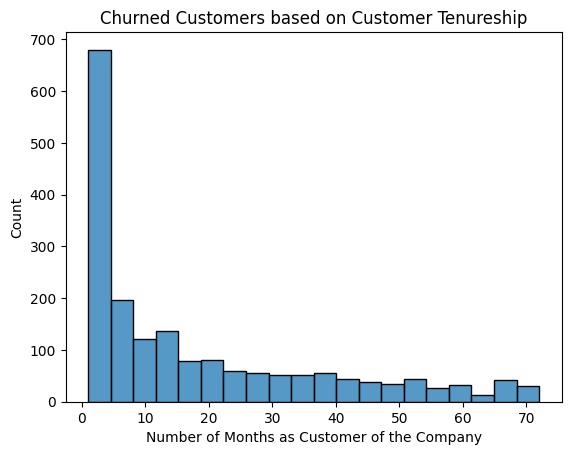

In [ ]:
# tenure on Churning Propensity

sns.histplot(data=df_churned, x='tenure', bins=20)

plt.title('Churned Customers based on Customer Tenureship')

plt.xlabel('Number of Months as Customer of the Company')

plt.show()

__Comment__: The longer the customer has been a satisfied customer, the less likely he/she will churn. Churning rate is highest for customers who haven't not lasted more than a year.

### Type of Contract as a Factor

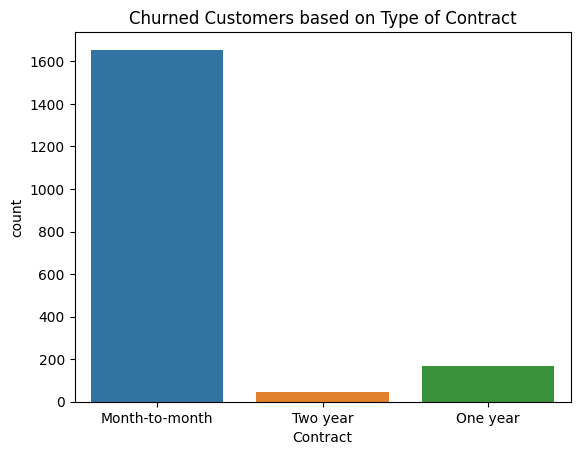

In [ ]:
# Contract on Churning Propensity

sns.countplot(data=df_churned, x='Contract')

plt.title('Churned Customers based on Type of Contract')

plt.show()

__Comment__: Quite reasonably, the customers who subscribed to longer-term contracts are less likely to churn. Most of the churned customers have monthly contracts.

### Billing Method as a Factor

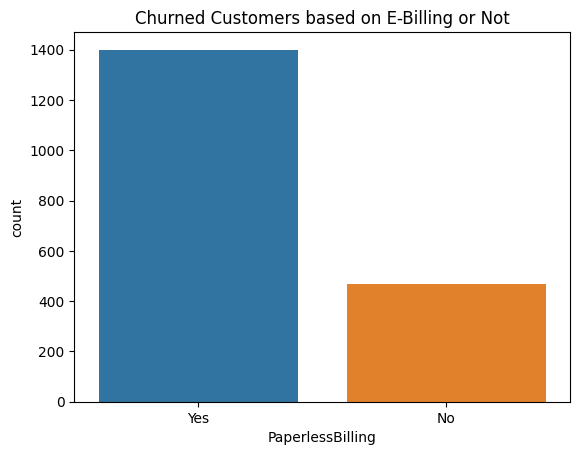

In [ ]:
# PaperlessBilling on Churning Propensity

sns.countplot(data=df_churned, x='PaperlessBilling')

plt.title('Churned Customers based on E-Billing or Not')

plt.show()

__Comment__: Customers who receive paper bills in the mail (instead of electronic) are less likely to churn.

### Payment Method as a Factor

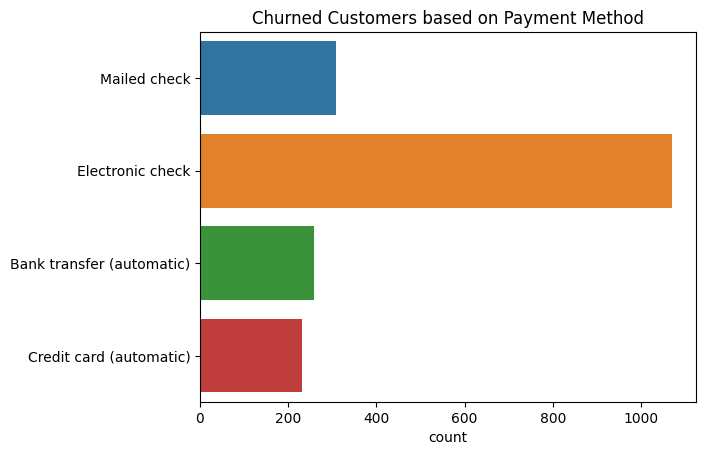

In [ ]:
# PaymentMethod on Churning Propensity

sns.countplot(data=df_churned, y='PaymentMethod', orient='h')

plt.title('Churned Customers based on Payment Method')
plt.ylabel(None)

plt.show()

__Comment__: Customers with electronic check as payment method tend to churn. Automatic credit card payment and automatic bank transfer result in least churning.

### Monetary Factors

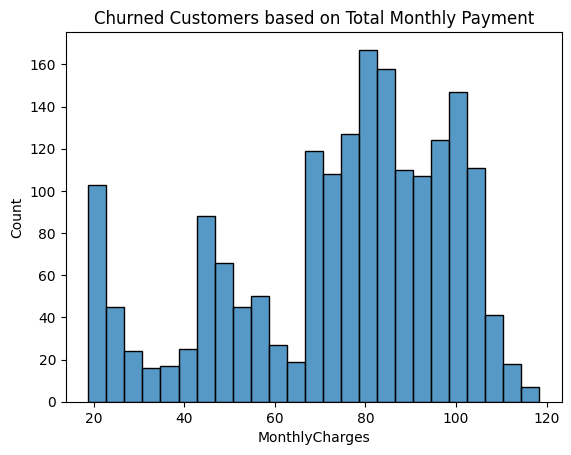

In [ ]:
# MonthlyCharges on Churning Propensity

sns.histplot(data=df_churned, x='MonthlyCharges', bins=25)

plt.title('Churned Customers based on Total Monthly Payment')

plt.show()

__Comment__: Customers with total monthly charge of around 70-100 monetary units tend to churn the most. Interestingly, there's a spike of increased tendency to churn for customers with monthly charge of around 20 and around 45 monetary units.

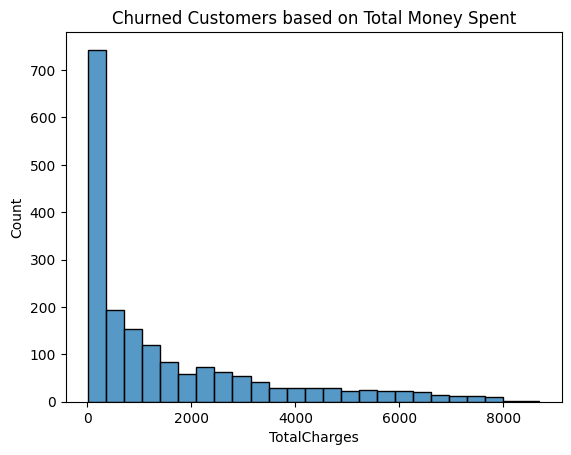

In [ ]:
# TotalCharges on Churning Propensity

sns.histplot(data=df_churned, x='TotalCharges', bins=25)

plt.title('Churned Customers based on Total Money Spent')

plt.show()

__Comment__: The histogram shows the lesser the total historical payment to the company, the higher the chance to churn. But we should be careful in interpreting this graph lest we increase prices to decrease churn.

In the __tenure__ variable that was previously visualized, most customers tend to churn within 1 year as a customer. In other words, their historical payments have not grown yet. Thus, as we can see here, the spike on number of churned customers  on the lowest total charge (around 300 monetary units) are those that did not stay long subscribing to the company service(s).

In the histogram above, the tendency to churn decreases as total charges to customers increases but that's because customers who like the service longer won't churn and keep increasing money paid to the company. It would be a _mistake_ to advise the company to _increase_ all service prices (so __TotalCharges__ would increase) by virtue of the above histogram.

### Why do customers with phone service (but no internet service) churn?

In this specific set of people we can figure out what is about the phone service that made them churn. Note: Some customers have phone AND internet services.

In [ ]:
# Get dataframe for churned customers who have phone service but don't have internet service

condition = (df_churned['PhoneService'] == 'Yes') & (df_churned['InternetService'] == 'No')

df_churned_phone = df_churned[condition]

# Print how many rows or how many customers have phone service but don't have internet service
print(df_churned_phone.shape)

# Show dataframe snippet
df_churned_phone.tail()

(113, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6558,4488-PSYCG,Male,0,No,No,16,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.25,327.45,Yes
6609,1000-AJSLD,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.10,20.10,Yes
6789,7839-QRKXN,Female,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,20.20,Yes
6792,4597-ELFTS,Male,0,No,No,56,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,24.90,1334.00,Yes
6969,4745-LSPLO,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.50,20.50,Yes


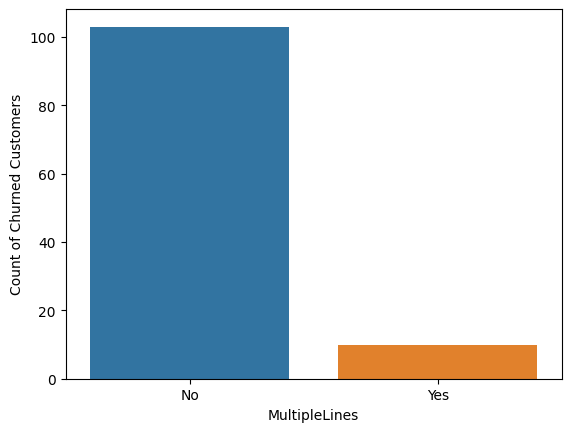

In [ ]:
# Let's check how having multiple lines affect churning for this set of customers

sns.countplot(data=df_churned_phone, x='MultipleLines')
plt.ylabel('Count of Churned Customers')
plt.show()

__Comment__: For customers who only experience the phone service (and not the internet service), they are less likely to churn if they subscribed to multi-line system.

### Similarly, why do customers with internet service (but no phone service) churn?

In [190]:
df_churned['InternetService'].value_counts()

Fiber optic    1297
DSL             459
No              113
Name: InternetService, dtype: int64

In [ ]:
# Create dataframe for churned customers who only have internet service (and no phone service)

condition = (df_churned['InternetService'] != 'No') & (df_churned['PhoneService'] == 'No')
df_churned_net = df_churned[condition]

print(df_churned_net.shape)

df_churned_net.tail(10)

(170, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6757,5294-CDGWY,Male,0,Yes,Yes,51,No,No phone service,DSL,Yes,...,Yes,No,Yes,Yes,One year,No,Electronic check,59.30,3014.65,Yes
6791,5204-QZXPU,Male,0,No,No,19,No,No phone service,DSL,No,...,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,39.65,733.35,Yes
6810,7758-XKCBS,Male,0,No,No,15,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.70,438.25,Yes
6811,8992-JQYUN,Male,0,Yes,No,1,No,No phone service,DSL,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,50.35,50.35,Yes
6813,0617-AQNWT,Female,0,Yes,No,64,No,No phone service,DSL,Yes,...,Yes,Yes,No,Yes,Two year,No,Electronic check,47.85,3147.50,Yes
6864,5480-HPRRX,Female,1,No,No,3,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,25.30,77.75,Yes
6884,7384-GHBPI,Male,0,Yes,No,3,No,No phone service,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,35.15,99.75,Yes
6943,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),30.50,30.50,Yes
6980,0786-VSSUD,Male,1,No,No,16,No,No phone service,DSL,No,...,No,No,Yes,No,Month-to-month,Yes,Mailed check,39.00,679.85,Yes
6999,2108-XWMPY,Male,0,No,No,3,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,35.45,106.85,Yes


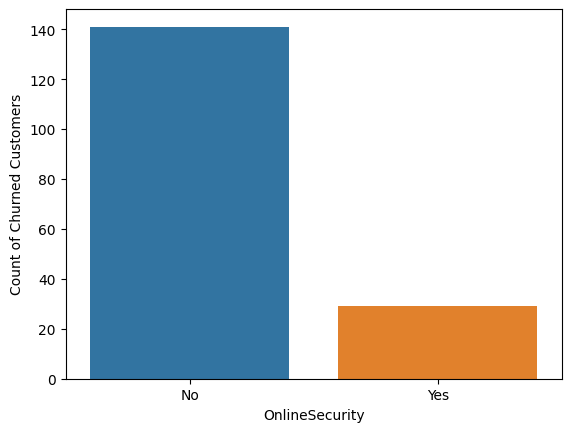

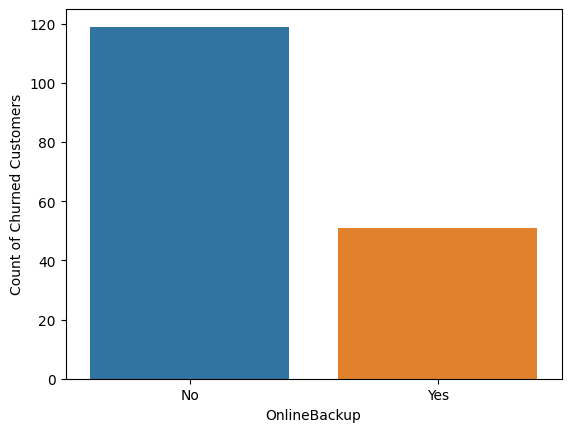

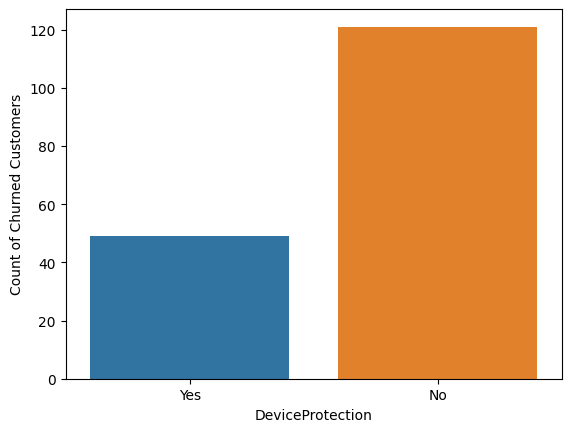

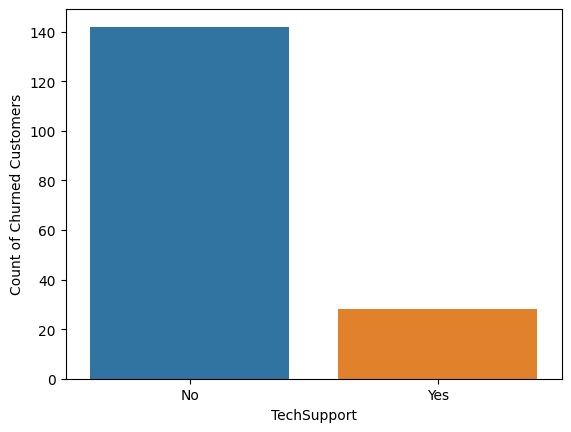

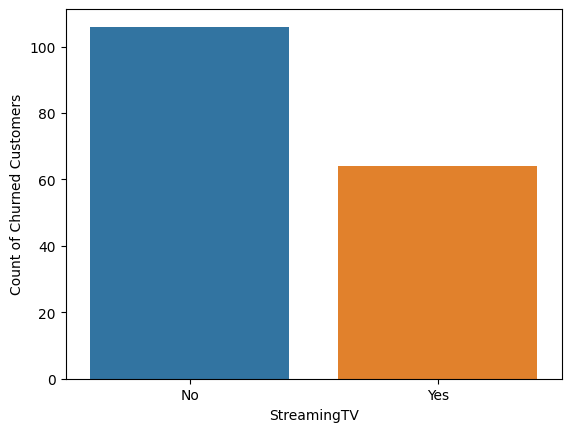

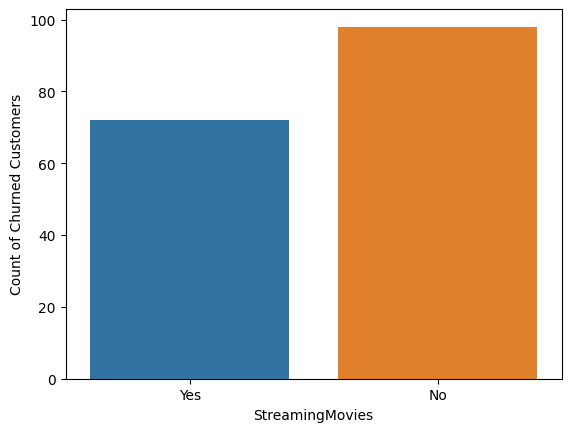

In [ ]:
# Plot the graphs per service for number of churned customers who only have internet service

net_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                'StreamingTV', 'StreamingMovies',]

for variable in net_services:
  sns.countplot(data=df_churned_net, x=variable)
  plt.ylabel('Count of Churned Customers')
  plt.show()

__Comment__: Nothing suprising here, every type of offered service correlates to less churning. We can infer every subscribed internet service is giving some satisfaction for the customers (as it should be). For example, customers who subscribed to movie streaming service are less likely to churn than those who did not. The same logic applies to other types of internet service.

## <font color=blue>Conclusion from Data Exploration</font>



The 17 features that can help decrease customer churning are:

1. Demographic: __SeniorCitizen__ (less likely to churn if senior), __Partner__ (less likely to churn if with partner), __Dependents__ (less likely to churn if with dependent(s).

2. Service: _Less likely if subscribed_ to the following services:
  1. __PhoneService__
  2.__InternetService__ (less likely if DSL than Fiber Optic)
  3. __MultipleLines__  
  4. __OnlineSecurity__
  5. __OnlineBackup__
  6. __DeviceProtection__
  7. __TechSupport__
  8. __StreamingTV__
  9. __StreamingMovies__

3. __Contract__ (less likely if 1-year or 2-year contract)

4. __PaperlessBilling__ (less likely if NOT paperless)

5. __PaymentMethod__ (out of the 4 methods, electronic check method has a _higher churning_ than the other 3 by significant margin)

6. __MonthlyCharges__ (these monetary units tend to have _higher churn_: 20, 45, 80-100)

7. __tenure__ (less likely to churn the longer the customer subscribes to the company)


## Ensure that there is no significant association between Gender and Churn categorical variables

In [191]:
import scipy.stats as stats

In [192]:
contigency_table = pd.crosstab(df['gender'], df['Churn'])
contigency_table

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


In [193]:
chi2, p_value, _, _ = stats.chi2_contingency(contigency_table)

print('Chi-Squared Statistic: {:0.3f}'.format(chi2))
print('P-value: {:0.3f}'.format(p_value))

if p_value < 0.05:
  print('For alpha = 0.05, there is significant association between Gender and Churn variables')
else:
  print('For alpha = 0.05, there is NO significant association between Gender and Churn variables')

Chi-Squared Statistic: 0.484
P-value: 0.487
For alpha = 0.05, there is NO significant association between Gender and Churn variables


## Create a dataframe with reduced variables

In [195]:
# Print the names of the columns for easy copy-pasting
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [194]:
# Create the dataframe with selected features (from Data Exploration conclusion)
# The only variable NOT selected are the 'customerID' and 'gender'

df_selected = df.drop(['customerID', 'gender'], axis=1)

df_selected.tail(10)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,0,No,No,38,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,0,No,No,19,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.10,No
7036,0,No,No,12,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.30,No
7037,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


## Data Wrangling: Converting to Dummy Variables


### MultipleLines

In [196]:
df_selected['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [197]:
# Replace 0 for 'No phone service' and 'No' then 1 for 'Yes'
# NOTE: Both 'No phone service' and 'No' values are NOT multiple lines.

df_selected['MultipleLines'] = df_selected['MultipleLines'].replace(['No phone service', 'No', 'Yes'], [0, 0, 1])

In [198]:
df_selected['MultipleLines'].value_counts()

0    4072
1    2971
Name: MultipleLines, dtype: int64

### Converting 'Yes' to 1 and 'No' to 0 from any column in our __df_selected__ dataframe

In [199]:
df_selected = df_selected.replace(['Yes', 'No'], [1,0])

### Converting 'No internet service' values to 0

NOTE: For columns __OnlineSecurity__, __OnlineBackup__, __DeviceProtection__, __TechSupport__, __StreamingTV__, and __StreamingMovies__, 'No' and 'No internet service' are technically the same. If a customer does not subscribe to Internet Service, it follows that they does not have any kind of internet service.

In [200]:
df_selected = df_selected.replace('No internet service', 0)

### InternetService, Contract, PaymentMethod (to Dummy Variables)

In [201]:
# Print the distinct values for InternetService, Contract, and PaymentMethod

my_list = ['InternetService', 'Contract', 'PaymentMethod',]

for variable in my_list:
  print(df_selected[variable].value_counts())
  print('')

Fiber optic    3096
DSL            2421
0              1526
Name: InternetService, dtype: int64

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64



In [202]:
# Get dummy variables for InternetService, Contract, and PaymentMethod

df_selected = pd.get_dummies(df_selected, columns=my_list)

In [203]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   Partner                                  7043 non-null   int64  
 2   Dependents                               7043 non-null   int64  
 3   tenure                                   7043 non-null   int64  
 4   PhoneService                             7043 non-null   int64  
 5   MultipleLines                            7043 non-null   int64  
 6   OnlineSecurity                           7043 non-null   int64  
 7   OnlineBackup                             7043 non-null   int64  
 8   DeviceProtection                         7043 non-null   int64  
 9   TechSupport                              7043 non-null   int64  
 10  StreamingTV                              7043 no

In [204]:
# Convert datatypes to either integer or float

df_selected = df_selected.applymap(pd.to_numeric)

In [205]:
# Check datatypes
df_selected.dtypes

SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_0                            int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
Contract_Month-to-month        

In [206]:
df_selected.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'InternetService_0',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [207]:
# Move the Churn target variable to the last column

df_selected = df_selected[['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'InternetService_0',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'Churn']]

In [208]:
df_selected.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,0,1,0,0,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0
1,0,0,0,34,1,0,1,0,1,0,...,1,0,0,1,0,0,0,0,1,0
2,0,0,0,2,1,0,1,1,0,0,...,1,0,1,0,0,0,0,0,1,1
3,0,0,0,45,0,0,1,0,1,1,...,1,0,0,1,0,1,0,0,0,0
4,0,0,0,2,1,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,1


## Check Distribution and Outliers for Continuous Variables (tenure, MonthlyCharges, and TotalCharges)


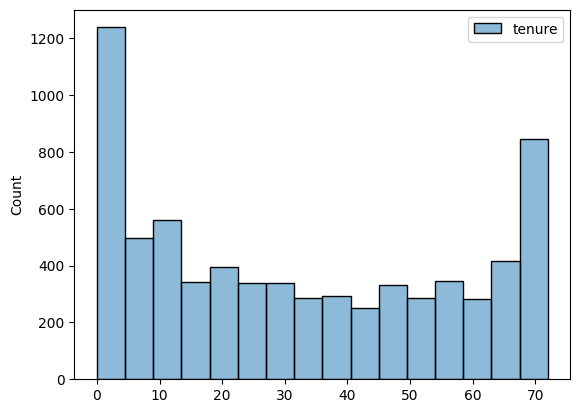

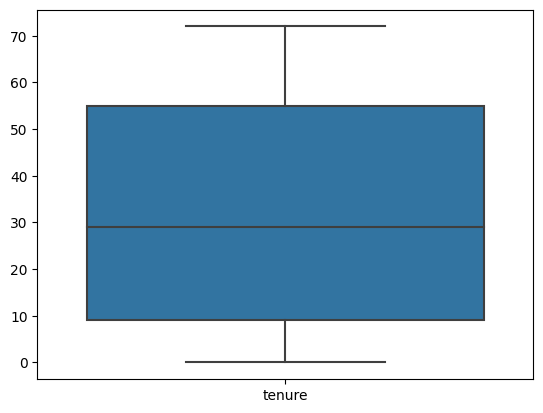

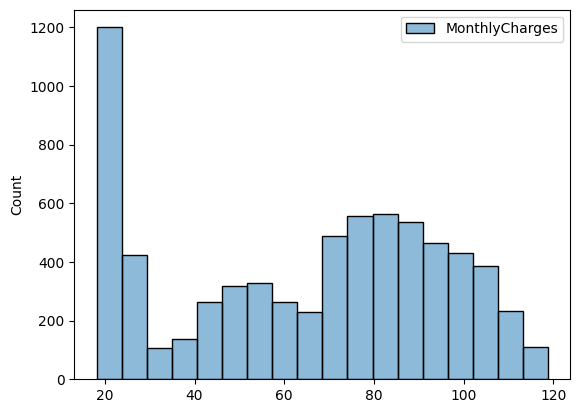

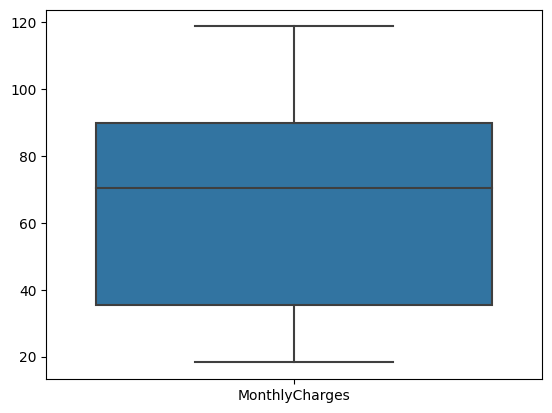

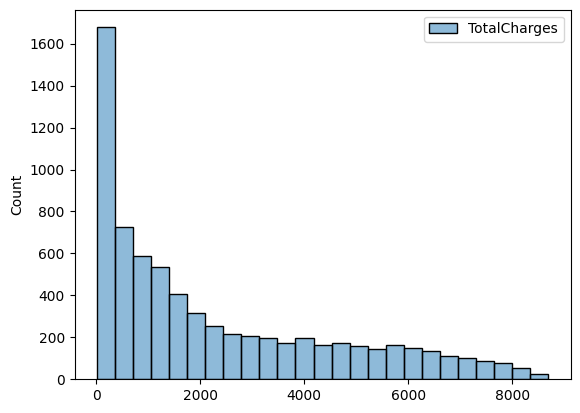

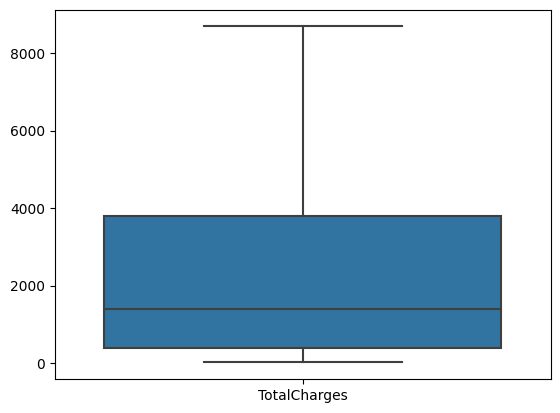

In [209]:
num_list = ['tenure', 'MonthlyCharges', 'TotalCharges']

for column in num_list:
  sns.histplot(data=df_selected[[column]])
  plt.show()

  sns.boxplot(data=df_selected[[column]])
  plt.show()

__Comments__:
1. The 3 continuous variables are __not normally distributed__.

2. There are no outliers for each of the three columns.

With these observations, we can use `MinMaxScaler()` to scale these 3 variables later.

# <font color=blue>ML Classification Modeling</font>
Our goal for this part is to develop a predictive model that determines if a customer will churn. In this way, we can have a preventive measure to retain them by giving discounts, consulting for any problems with company services, loyalty vouchers, etc.

### Separate Features and the Target

In [210]:
features = df_selected.drop('Churn', axis=1)
y = df_selected['Churn']

### Create Training and Testing sets

In [211]:
from sklearn.model_selection import train_test_split

In [212]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.2, random_state=8)

print(len(X_train), ':', len(y_train))
print(len(X_test), ':', len(y_test))

5634 : 5634
1409 : 1409


## Training our Models using the Training Set

We will use 5 algorithms: KNN, Logistic Reg, SVM, Random Forest, and Gradient Boosting.





### Normalization of Training Set's Features

In [213]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [214]:
normalized_array = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(normalized_array, columns=X_train.columns)
X_train_scaled.head(10)

# NOTE: The binary features are not affected by the min-max scaling.

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,1.0,0.0,0.972222,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.347222,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.013889,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,1.0,1.0,0.152778,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.680556,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.0,1.0,0.0,0.347222,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,1.0,0.208333,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8,0.0,1.0,1.0,0.569444,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.097222,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


NOTE: Our data for training our models are the __X_train_scaled__ and __y_train__. Let us now proceed to train our 5 models.

In [215]:
# Import Models

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

### 1. K-Nearest Neighbors (KNN)

In [216]:
# Create our KNN model

knn = KNeighborsClassifier()

# Find the best n_neighbors parameter using GridSearchCV

param_grid_knn = {'n_neighbors': list(range(1,51))}

grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5)

grid_search_knn.fit(X_train_scaled, y_train)

# Print the best parameter and accuracy score
print("Best k:", grid_search_knn.best_params_['n_neighbors'])
print("Best score:", grid_search_knn.best_score_)

# Assign the best KNN model
knn_final = grid_search_knn.best_estimator_
knn_final

Best k: 50
Best score: 0.7958825912015899


KNeighborsClassifier(n_neighbors=50)

### 2. Logistic Regression

In [217]:
# Create our Logistic Regression model

log_reg = LogisticRegression(solver='liblinear')

# Find the best C parameter using GridSearchCV

param_grid_LR = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_LR = GridSearchCV(log_reg, param_grid_LR, cv=5)

grid_search_LR.fit(X_train_scaled, y_train)

# Print the best parameter and accuracy score

print("Best C:", grid_search_LR.best_params_['C'])
print("Best score:", grid_search_LR.best_score_)

# Assign the best Logistic Regression model

log_reg_final = grid_search_LR.best_estimator_
log_reg_final

Best C: 100
Best score: 0.8100794167385079


LogisticRegression(C=100, solver='liblinear')

### 3. Support Vector Machine (SVM)

In [218]:
# Create our SVM model

svm = SVC(probability=True)

# Find the best C parameter using GridSearchCV

param_grid_svm = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5)

grid_search_svm.fit(X_train_scaled, y_train)

# Print the best parameter and accuracy score

print('Best C:', grid_search_svm.best_params_['C'])
print('Best score:', grid_search_svm.best_score_)

# Assign the best SVM model

svm_final = grid_search_svm.best_estimator_
svm_final

Best C: 1
Best score: 0.8058195337753606


SVC(C=1, probability=True)

### 4. Random Forest Classifier

In [220]:
# Create our RFC model

rfc = RandomForestClassifier(random_state=8)

# Find the best max_depth parameter using GridSearchCV

param_grid_rfc = {'max_depth': list(range(5,31))}

grid_search_rfc = GridSearchCV(rfc, param_grid_rfc, cv=5)

grid_search_rfc.fit(X_train_scaled, y_train)

# Print the best parameter and accuracy score

print('Best max_depth:', grid_search_rfc.best_params_['max_depth'])
print('Best score:', grid_search_rfc.best_score_)

# Assign our best rf model

rfc_final = grid_search_rfc.best_estimator_
rfc_final

Best max_depth: 8
Best score: 0.8065315893907181


RandomForestClassifier(max_depth=8, random_state=8)

### 5. Gradient Boosting Classifier

In [221]:
# Create our GBC model

gbc = GradientBoostingClassifier()

# Find the best learning_rate parameter using GridSearchCV

param_grid_gbc = {'learning_rate': [0.001, 0.01, 0.1, 0.2]}

grid_search_gbc = GridSearchCV(gbc, param_grid_gbc, cv=5)

grid_search_gbc.fit(X_train_scaled, y_train)

# Print the best parameter and accuracy score

print('Best learning_rate:', grid_search_gbc.best_params_['learning_rate'])
print('Best score:', grid_search_gbc.best_score_)

# Assign our best GBC model

gbc_final = grid_search_gbc.best_estimator_
gbc_final

Best learning_rate: 0.1
Best score: 0.8028036204828677


GradientBoostingClassifier()

## Testing our Models using the Testing Set

Just like what we did for the training set, we also need to normalize the features of the testing set.

### Normalization of Testing Set's Features

In [222]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [223]:
normalized_array = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(normalized_array, columns=X_test.columns)

print(X_test_scaled.shape)

X_test_scaled.head(10)

(1409, 25)


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,1.0,0.0,0.986111,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.041667,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.013889,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.111111,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.833333,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,0.0,1.0,0.0,1.000000,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.416667,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,1.0,0.055556,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,1.0,1.0,0.833333,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,0.055556,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [224]:
# Import libraries for performance report

from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

### Evaluate our KNN model

In [225]:
# Produce scores for typical classification metrics

y_pred_knn = knn_final.predict(X_test_scaled)

report = classification_report(y_test, y_pred_knn)

print(report)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1027
           1       0.59      0.54      0.57       382

    accuracy                           0.78      1409
   macro avg       0.71      0.70      0.71      1409
weighted avg       0.77      0.78      0.77      1409



In [226]:
# Produce ROC-AUC score

y_pred_knn_proba = knn_final.predict_proba(X_test_scaled)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_knn_proba)

print('ROC-AUC score:', roc_auc)

ROC-AUC score: 0.8266031801057316


### Evaluate our Logistic Regression model

In [227]:
# Produce scores for typical classification metrics

y_pred_lr = log_reg_final.predict(X_test_scaled)

report = classification_report(y_test, y_pred_lr)

print(report)

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1027
           1       0.61      0.52      0.56       382

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.77      0.78      0.77      1409



In [228]:
# Produce ROC-AUC score

y_pred_lr_proba = log_reg_final.predict_proba(X_test_scaled)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_lr_proba)

print('ROC-AUC score:', roc_auc)

ROC-AUC score: 0.836302043771061


### Evaluate our SVM model

In [229]:
# Produce common classification metrics scores

y_pred_svm = svm_final.predict(X_test_scaled)

report = classification_report(y_test, y_pred_svm)

print(report)

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1027
           1       0.61      0.48      0.54       382

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.70      1409
weighted avg       0.76      0.78      0.77      1409



In [230]:
# Produce ROC-AUC score

y_pred_svm_proba = svm_final.predict_proba(X_test_scaled)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_svm_proba)

print('ROC-AUC score:', roc_auc)

ROC-AUC score: 0.7840046493370106


### Evaluate our RFC model

In [231]:
# Produce common classification metrics scores

y_pred_rfc = rfc_final.predict(X_test_scaled)

report = classification_report(y_test, y_pred_rfc)

print(report)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1027
           1       0.64      0.49      0.56       382

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [232]:
# Produce ROC-AUC score

y_pred_rfc_proba = rfc_final.predict_proba(X_test_scaled)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_rfc_proba)

print('ROC-AUC score:', roc_auc)

ROC-AUC score: 0.8388370030128927


### Evaluate our GBC model

In [233]:
# Produce common classification metrics scores

y_pred_gbc = gbc_final.predict(X_test_scaled)

report = classification_report(y_test, y_pred_gbc)

print(report)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1027
           1       0.64      0.49      0.56       382

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [234]:
# Produce ROC-AUC score

y_pred_gbc_proba = gbc_final.predict_proba(X_test_scaled)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_gbc_proba)

print('ROC-AUC score:', roc_auc)

ROC-AUC score: 0.8432225207359411


## Comparison of Models

Because we have an imbalanced dataset, let us compare our models via their ROC-AUC scores. In case of a tie, we will use their weighted average f1-scores as additional judgment.

In [235]:
data = {'GBC': [0.843, 0.78],
        'RFC': [0.839, 0.78],
        'LR': [0.836, 0.77],
        'KNN': [0.827, 0.77],
        'SVM': [0.784, 0.77]
}

scores = pd.DataFrame(data)
scores.index = ['ROC-AUC', 'weighted f1']
scores

,GBC,RFC,LR,KNN,SVM
ROC-AUC,0.843,0.839,0.836,0.827,0.784
weighted f1,0.780,0.780,0.770,0.770,0.770


Our Support Vector Machine (SVM) performed the weakest at 0.786 while our Gradient Boosting Classifier (GBC) performed best at an ROC-AUC score of 0.843. The confusion matrix for our best model is given below.

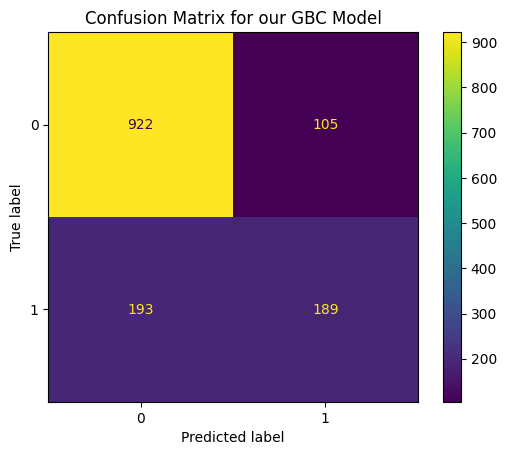

In [236]:
cm = confusion_matrix(y_test, y_pred_gbc)
cm_display = ConfusionMatrixDisplay(cm)

cm_display.plot()
plt.title('Confusion Matrix for our GBC Model')
plt.show()

From the confusion matrix, we can see that the general accuracy of our GBC model is 100*(922+189)/1409 = 79%.

## <font color=blue>Conclusion from ML Modeling</font>

Out of the five models trained for the telecommunication company's churning dataset, our best model for predicting customer churning is __Gradient Boosting Classifier__ (tuned at `learning_rate=0.1`, the rest of the parameters are default). Its ROC-AUC score is 0.843, its weighted f1-score is 0.780, and its accuracy is 0.79.